In [1]:
# Below code found at https://github.com/jupyterlite/jupyterlite/issues/119
import pandas as pd 
#import micropip
#package_url = "https://raw.githubusercontent.com/innovationOUtside/ouseful_jupyterlite_utils/main/ouseful_jupyterlite_utils-0.0.1-py3-none-any.whl"
#await micropip.install(package_url)

#from ouseful_jupyterlite_utils import pandas_utils as pdu

# use this approach if CSV data is at a remote URL
# Via @jtpio
#URL = "https://raw.githubusercontent.com/edgecollective/wastewater-parse/main/waste.csv"
#df = pd.read_csv('test_by_date.csv')
#df1 = pd.read_csv('archive_mar7.csv')

#import pandas as pd 
file = 'covid-19-raw-data-4-4-2022.xlsx'
#file = 'covid-19-dashboard_03-11-2022.xlsx'
#file = 'covid-19-dashboard-march-18-2022_0.xlsx'
data = pd.ExcelFile(file)
#print(data.sheet_names)
df=data.parse('TestingByDate (Test Date)')
df

,Date,Molecular Total,Molecular New,Molecular Positive New,Antigen Positive New,Antigen New,Antigen Total,All Antigen Tests,All Positive Antigen Tests,First Molecular Test per person,...,All Molecular Tests_MA without Higher ED,All Positive Molecular Tests_MA without Higher ED,7-day weighted average positive test rate all molecular tests in MA,7-day weighted average positive test rate all molecular tests_Higher Ed ONLY,7-day weighted average positive test rate all molecular tests_MA without Higher ED,7-day average All Molecular Tests,7-day average daily molecular tests_MA without Higher ED,7-day average daily molecular tests_Higher ED ONLY,7-day average daily POSITIVE molecular tests_MA without Higher ED,7-day average daily POSITIVE molecular tests_Higher ED ONLY
0,2020-01-22,1,1,0,0,0,0,0,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,2,1,0,0,0,0,0,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,2,0,0,0,0,0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,2,0,0,0,0,0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,2,0,0,0,0,0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,2022-03-30,11581286,15718,1434,218,3177,2159626,6624,227,NaN,...,55537.0,1476.0,0.024196,0.010164,0.031734,46732.142857,30400.142857,16332.0,964.714286,166.0
799,2022-03-31,11595988,14702,1307,225,2996,2162622,5148,236,NaN,...,NaN,NaN,0.024866,NaN,NaN,47385.857143,NaN,NaN,NaN,NaN
800,2022-04-01,11605771,9783,918,154,2194,2164816,3819,162,NaN,...,NaN,NaN,0.025410,NaN,NaN,46933.857143,NaN,NaN,NaN,NaN
801,2022-04-02,11609438,3667,296,51,975,2165791,1310,66,NaN,...,NaN,NaN,0.024910,NaN,NaN,46029.000000,NaN,NaN,NaN,NaN


In [2]:
import matplotlib.pyplot as plt
import datetime as dt
        #d = dt.datetime.strptime(this_date,'%m/%d/%Y').date()

dates=df['Date'].to_numpy()
#mol_total = df.iloc[:,[1]]
ant_new =  df.iloc[:,[5]].to_numpy()
ant_pos_new =  df.iloc[:,[4]].to_numpy()

x_a=[]
y_a=[]
n_a=[]
for i in range(0,len(dates)):
    this_date = dates[i]
    if (float(ant_pos_new[i]) > 0.):
        this_positivity = float(ant_pos_new[i])/float(ant_new[i])
        #d = dt.datetime.strptime(this_date,'%m/%d/%Y').date()
        if (this_positivity < .8):
            #x_a.append(d)
            x_a.append(this_date)
            y_a.append(this_positivity)
            n_a.append(float(ant_new[i]))


In [3]:
import matplotlib.pyplot as plt
import datetime as dt

dates=df['Date'].to_numpy()
#mol_total = df.iloc[:,[1]]
mol_new =  df.iloc[:,[2]].to_numpy()
mol_pos_new =  df.iloc[:,[3]].to_numpy()

x_m=[]
y_m=[]
n_m=[]
for i in range(0,len(dates)):
    this_date = dates[i]
    if (float(mol_pos_new[i]) > 0.):
        this_positivity = float(mol_pos_new[i])/float(mol_new[i])
        #this_positivity = mol_pos_new[i]
        #print(mol)
        #this_positivity = float(mol_pos_new[i])/100.
        if (this_positivity < .8):
            #d = dt.datetime.strptime(this_date,'%m/%d/%Y').date()
            #x_m.append(d)
            x_m.append(this_date)
            y_m.append(this_positivity)
            n_m.append(float(mol_new[i]))



https://publichealth.jhu.edu/2020/covid-19-testing-understanding-the-percent-positive#:~:text=The%20percent%20positive%20is%20exactly,total%20tests)%20x%20100%25.

https://globalhealth.harvard.edu/evidence-roundup-why-positive-test-rates-need-to-fall-below-3/

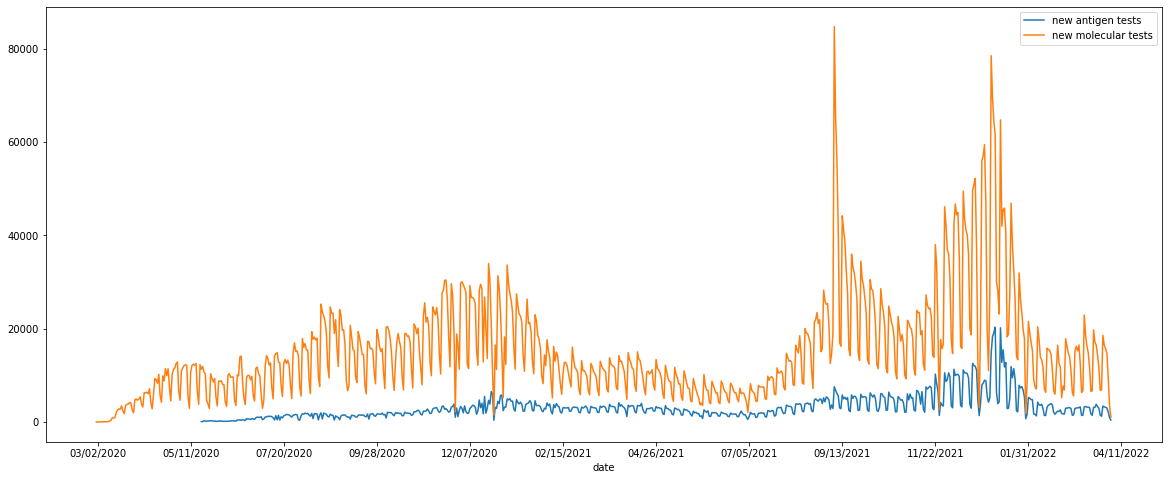

In [4]:
#https://matplotlib.org/3.5.1/gallery/subplots_axes_and_figures/two_scales.html


import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

#scale_shift_water = y_w_t_norm*200+5

#fig, ax1 = plt.subplots()

#ax1.set_ylabel('exp', color='orange')

#print(scale_shift_water.min())

#ax1.plot(x_w_t,scale_shift_water,'-',label='wastewater north + south (c/mL), scaled and shifted')

#ax1.plot(ref_dates,r1+scale_shift_water.min(),'b--',linewidth=1,label = 'minimum wastewater value over time period')

#plt.plot(x_w_t_run,y_w_t_norm_run*3,'-',label='wastewater, north + south (copies/mL), norm, 3d running ave')


#plt.plot(x_m,y_m,'-',label = 'positivity (%) molecular')
plt.plot(x_a,n_a,'-',label = 'new antigen tests')
plt.plot(x_m,n_m,'-',label = 'new molecular tests')

#plt.plot(x_m_run,y_m_run*10,'-',label = 'positivity (%) molecular, 3 day running ave')

#reference line


#plt.plot(x_a,y_a,'-',label = 'positivity (%) antigen')
#plt.ylim([0,.6])
#plt.ylabel('copies/mL')
plt.xlabel('date')

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 8)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
#plt.title('Positivity is the fraction of positive molecular tests on a given day')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

plt.show()



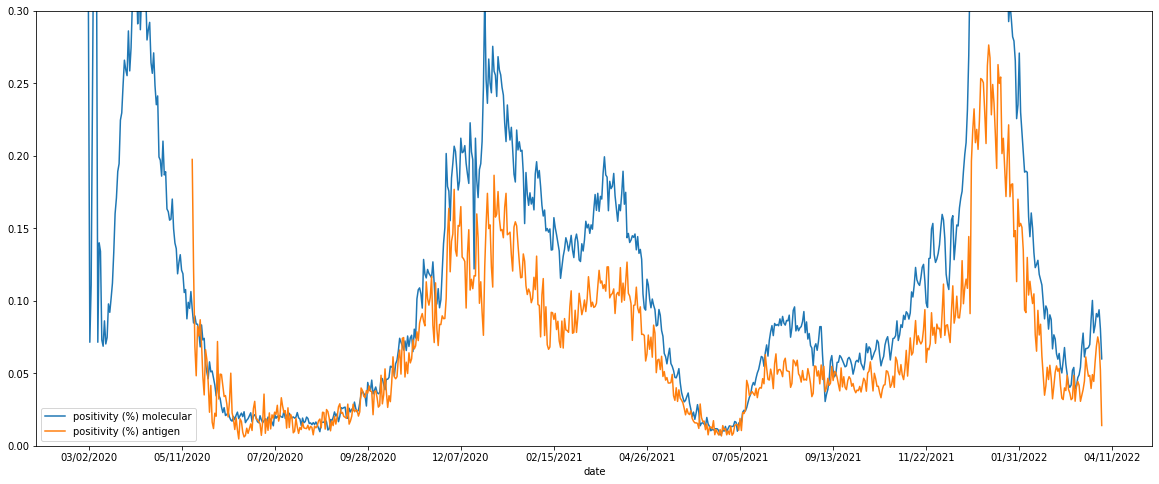

In [5]:
#https://matplotlib.org/3.5.1/gallery/subplots_axes_and_figures/two_scales.html


import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

#scale_shift_water = y_w_t_norm*200+5

#fig, ax1 = plt.subplots()

#ax1.set_ylabel('exp', color='orange')

#print(scale_shift_water.min())

#ax1.plot(x_w_t,scale_shift_water,'-',label='wastewater north + south (c/mL), scaled and shifted')

#ax1.plot(ref_dates,r1+scale_shift_water.min(),'b--',linewidth=1,label = 'minimum wastewater value over time period')

#plt.plot(x_w_t_run,y_w_t_norm_run*3,'-',label='wastewater, north + south (copies/mL), norm, 3d running ave')


plt.plot(x_m,y_m,'-',label = 'positivity (%) molecular')
plt.plot(x_a,y_a,'-',label = 'positivity (%) antigen')

#plt.plot(x_m_run,y_m_run*10,'-',label = 'positivity (%) molecular, 3 day running ave')

#reference line


#plt.plot(x_a,y_a,'-',label = 'positivity (%) antigen')
plt.ylim([0,.3])
#plt.ylabel('copies/mL')
plt.xlabel('date')

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 8)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
#plt.title('Positivity is the fraction of positive molecular tests on a given day')
plt.legend()
#plt.ylim([0,.2])
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

plt.show()



In [6]:
import matplotlib.pyplot as plt
import datetime as dt

dg = pd.read_csv('https://raw.githubusercontent.com/edgecollective/wastewater-parse/main/waste.csv')

region = 'Northern'
dates=dg['Date'].to_numpy()
counts_n=dg['Northern'].to_numpy()
counts_s=dg['Southern'].to_numpy()


In [7]:
x_w_n=[]
x_w_s=[]
y_w_n=[]
y_w_s=[]
x_w_t=[]
y_w_t=[]
for i in range(0,len(dates)):
    this_date = dates[i]
    this_count_n = str(counts_n[i])
    this_count_s = str(counts_s[i])
    if (len(this_date.split(" "))==1):
        if (len(this_count_n)>0) and (this_count_n != 'nan') and (len(this_count_n.split(" "))==1):
            if (len(this_count_s)>0) and (this_count_s != 'nan') and (len(this_count_s.split(" "))==1):
                
                d = dt.datetime.strptime(this_date,'%m/%d/%Y').date()
                
                x_w_n.append(d)
                y_w_n.append(float(this_count_n))
                
                x_w_s.append(d)
                y_w_s.append(float(this_count_s))

                x_w_t.append(d)
                #y_w_t.append(float(this_count_s)+float(this_count_n))
                y_w_t.append((float(this_count_s)+float(this_count_n))/2.)


In [8]:
import numpy as np
y_w_n_norm = np.array(y_w_n) / np.array(y_w_n).max()
y_w_s_norm = np.array(y_w_s) / np.array(y_w_s).max()

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

ave_window = 7

y_w_n_norm_run = running_mean(y_w_n_norm,ave_window)
#len(y_w_n_norm_run)
x_w_n_run = x_w_n[(ave_window-1):]

y_w_s_norm_run = running_mean(y_w_s_norm,ave_window)
#len(y_w_n_norm_run)
x_w_s_run = x_w_s[(ave_window-1):]


y_m_run = running_mean(y_m,ave_window)
x_m_run = x_m[(ave_window-1):]

#y_w_t = np.array(y_w_n) + np.array(y_w_s)
y_w_t_norm = np.array(y_w_t) / np.array(y_w_t).max()


ave_window = 3
y_w_t_norm_run = running_mean(y_w_t_norm,ave_window)
x_w_t_run = x_w_t[(ave_window-1):]

In [9]:
#len(x_w_n_run)
len(y_w_n_norm_run)

659

In [10]:
#r1 = np.zeros(N)
date_start=x_w_t[0]
date_end=x_w_t[len(x_w_t)-1]
ref_dates=[date_start,date_end]
#print(date_start,date_end)
r1=np.zeros(2)
print(r1,ref_dates)

[0. 0.] [datetime.date(2020, 3, 10), datetime.date(2022, 4, 1)]


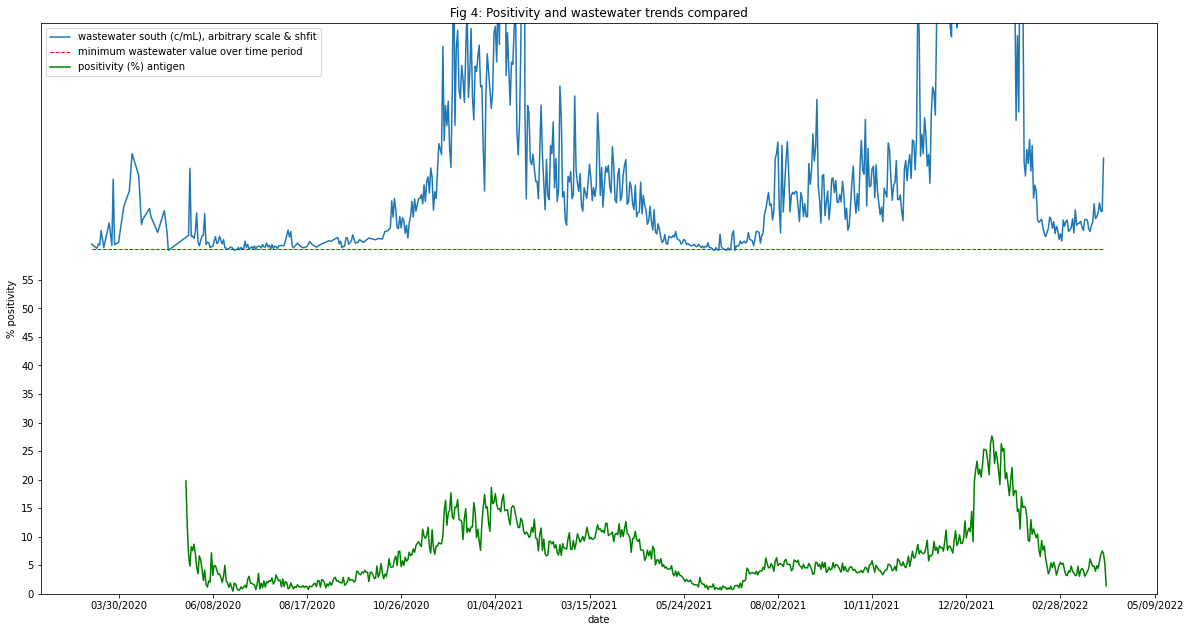

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

scaling = 500
scale_shift_water_n = y_w_n_norm*scaling+60
scale_shift_water_s = y_w_s_norm*scaling+60


#print(scale_shift_water.min())

#plt.plot(x_w_n,scale_shift_water_n,'r-',label='wastewater north (c/mL), arbitrary scale & shfit')
plt.plot(x_w_s,scale_shift_water_s,'-',label='wastewater south (c/mL), arbitrary scale & shfit')

plt.plot(ref_dates,r1+scale_shift_water_n.min(),'r--',linewidth=1,label = 'minimum wastewater value over time period')

#plt.plot(x_w_t_run,y_w_t_norm_run*3,'-',label='wastewater, north + south (copies/mL), norm, 3d running ave')

#plt.plot(x_m,np.array(y_m)*100,'b-',label = 'positivity (%) molecular')
plt.plot(x_a,np.array(y_a)*100,'g-',label = 'positivity (%) antigen')
#plt.plot(x_m_run,np.array(y_m_run)*100,'-',label = 'positivity (%) molecular, 3 day running ave')

#reference line


#plt.plot(x_a,y_a,'-',label = 'positivity (%) antigen')
max_y = 100
plt.ylim([0,max_y])
#plt.ylabel('copies/mL')
plt.ylabel('% positivity')
plt.xlabel('date')

plt.yticks(np.arange(0, 60, 5.0))

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 10.5)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
plt.title('Fig 4: Positivity and wastewater trends compared')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

plt.show()

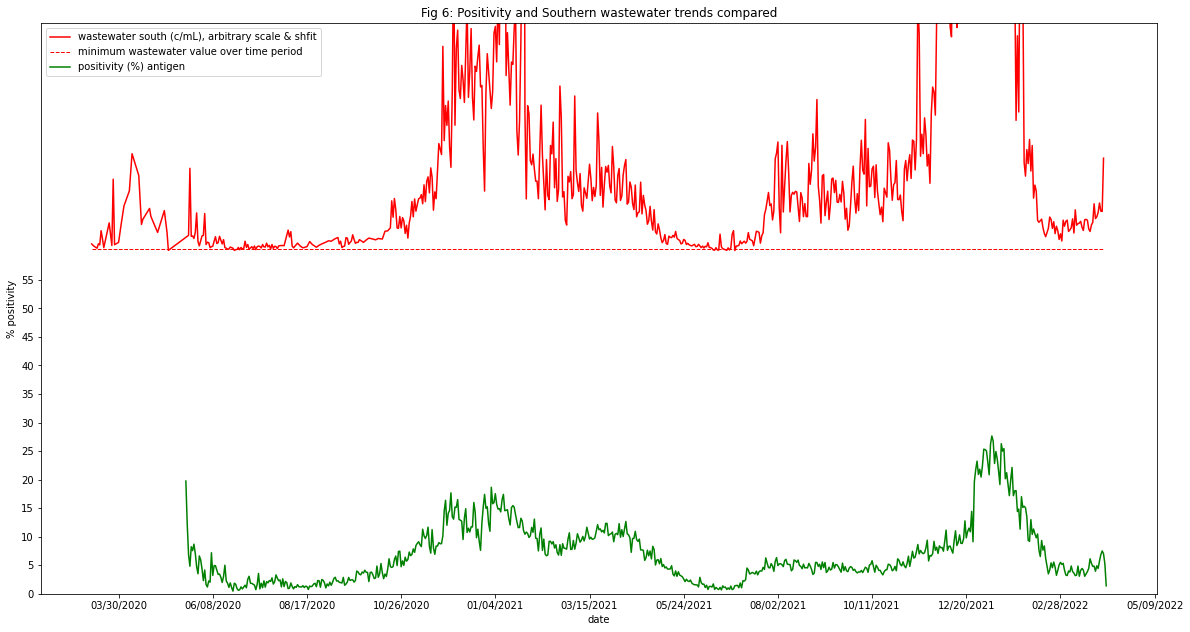

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

scaling = 500
scale_shift_water_n = y_w_n_norm*scaling+60
scale_shift_water_s = y_w_s_norm*scaling+60


#print(scale_shift_water.min())

#plt.plot(x_w_n,scale_shift_water_n,'r-',label='wastewater north (c/mL), arbitrary scale & shfit')
plt.plot(x_w_s,scale_shift_water_s,'r-',label='wastewater south (c/mL), arbitrary scale & shfit')

plt.plot(ref_dates,r1+scale_shift_water_n.min(),'r--',linewidth=1,label = 'minimum wastewater value over time period')

#plt.plot(x_w_t_run,y_w_t_norm_run*3,'-',label='wastewater, north + south (copies/mL), norm, 3d running ave')

#plt.plot(x_m,np.array(y_m)*100,'b-',label = 'positivity (%) molecular')
plt.plot(x_a,np.array(y_a)*100,'g-',label = 'positivity (%) antigen')
#plt.plot(x_m_run,np.array(y_m_run)*100,'-',label = 'positivity (%) molecular, 3 day running ave')

#reference line


#plt.plot(x_a,y_a,'-',label = 'positivity (%) antigen')
max_y = 100
plt.ylim([0,max_y])
#plt.ylabel('copies/mL')
plt.ylabel('% positivity')
plt.xlabel('date')

plt.yticks(np.arange(0, 60, 5.0))

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 10.5)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
plt.title('Fig 6: Positivity and Southern wastewater trends compared')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

plt.show()

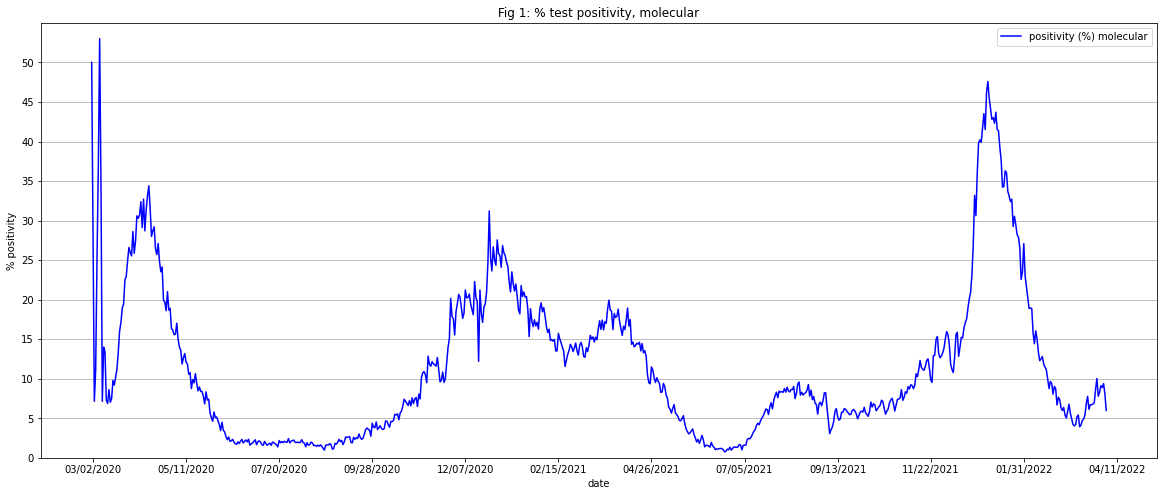

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

scaling = 300
scale_shift_water_n = y_w_n_norm*scaling+60
scale_shift_water_s = y_w_s_norm*scaling+60


#print(scale_shift_water.min())

#plt.plot(x_w_n,scale_shift_water_n,'-',label='wastewater north (c/mL), arbitrary scale & shfit')
#plt.plot(x_w_s,scale_shift_water_s,'-',label='wastewater south (c/mL), arbitrary scale & shfit')

#plt.plot(ref_dates,r1+scale_shift_water_n.min(),'b--',linewidth=1,label = 'minimum wastewater value over time period')

#plt.plot(x_w_t_run,y_w_t_norm_run*3,'-',label='wastewater, north + south (copies/mL), norm, 3d running ave')

plt.plot(x_m,np.array(y_m)*100,'b-',label = 'positivity (%) molecular')
#plt.plot(x_a,np.array(y_a)*100,'g-',label = 'positivity (%) antigen')

#plt.plot(x_m_run,np.array(y_m_run)*100,'-',label = 'positivity (%) molecular, 3 day running ave')

#reference line


#plt.plot(x_a,y_a,'-',label = 'positivity (%) antigen')
max_y = 55
plt.ylim([0,max_y])
#plt.ylabel('copies/mL')
plt.ylabel('% positivity')
plt.xlabel('date')

plt.yticks(np.arange(0, max_y, 5.0))

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 8)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
plt.title('Fig 1: % test positivity, molecular')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)
plt.grid(axis = 'y')
plt.show()

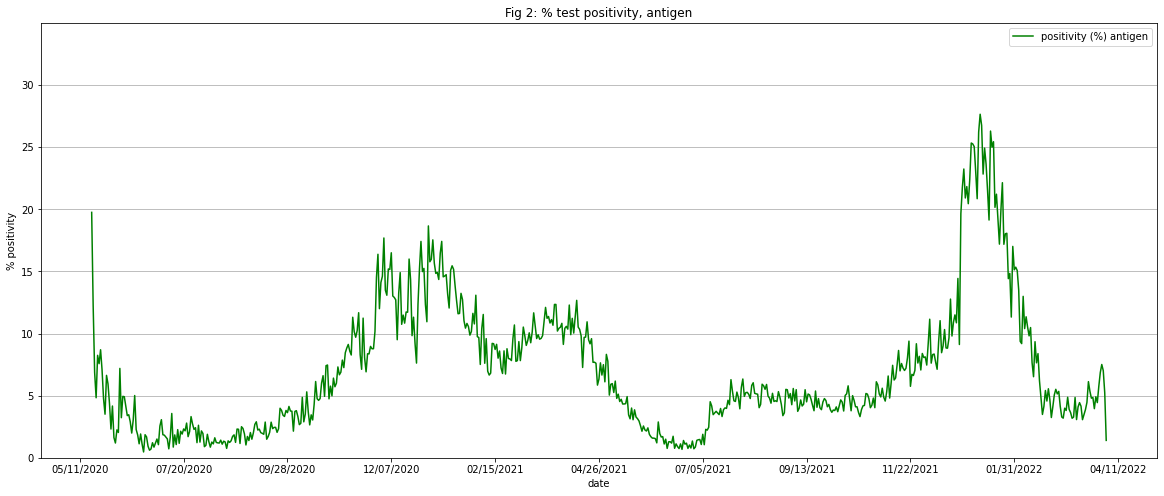

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

scaling = 300
scale_shift_water_n = y_w_n_norm*scaling+60
scale_shift_water_s = y_w_s_norm*scaling+60


#print(scale_shift_water.min())

#plt.plot(x_w_n,scale_shift_water_n,'-',label='wastewater north (c/mL), arbitrary scale & shfit')
#plt.plot(x_w_s,scale_shift_water_s,'-',label='wastewater south (c/mL), arbitrary scale & shfit')

#plt.plot(ref_dates,r1+scale_shift_water_n.min(),'b--',linewidth=1,label = 'minimum wastewater value over time period')

#plt.plot(x_w_t_run,y_w_t_norm_run*3,'-',label='wastewater, north + south (copies/mL), norm, 3d running ave')

#plt.plot(x_m,np.array(y_m)*100,'b-',label = 'positivity (%) molecular')
plt.plot(x_a,np.array(y_a)*100,'g-',label = 'positivity (%) antigen')

#plt.plot(x_m_run,np.array(y_m_run)*100,'-',label = 'positivity (%) molecular, 3 day running ave')

#reference line


#plt.plot(x_a,y_a,'-',label = 'positivity (%) antigen')
max_y = 35
plt.ylim([0,max_y])
#plt.ylabel('copies/mL')
plt.ylabel('% positivity')
plt.xlabel('date')

plt.yticks(np.arange(0, max_y, 5.0))

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 8)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
plt.title('Fig 2: % test positivity, antigen')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)
plt.grid(axis = 'y')

plt.show()

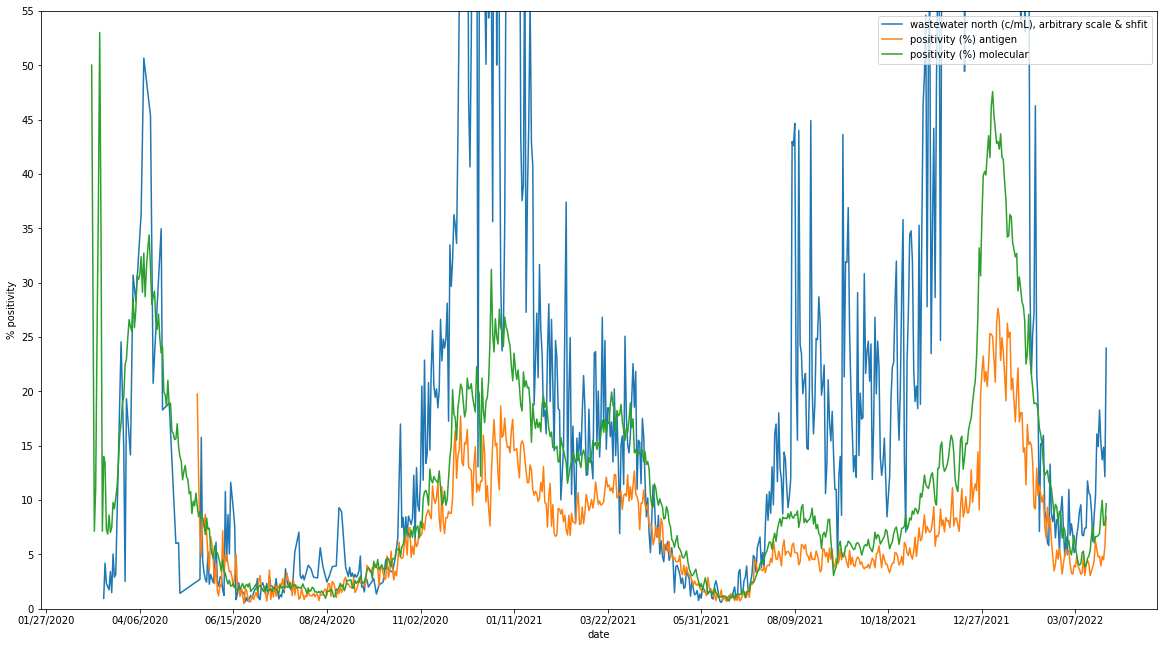

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

scaling = 700
shift = 0
scale_shift_water_n = y_w_n_norm*scaling+shift
scale_shift_water_s = y_w_s_norm*scaling+shift


#print(scale_shift_water.min())

plt.plot(x_w_n,scale_shift_water_n,'-',label='wastewater north (c/mL), arbitrary scale & shfit')
#plt.plot(x_w_s,scale_shift_water_s,'-',label='wastewater south (c/mL), arbitrary scale & shfit')

#plt.plot(ref_dates,r1+scale_shift_water_n.min(),'b--',linewidth=1,label = 'minimum wastewater value over time period')

#plt.plot(x_w_t_run,y_w_t_norm_run*3,'-',label='wastewater, north + south (copies/mL), norm, 3d running ave')

plt.plot(x_a,np.array(y_a)*100,'-',label = 'positivity (%) antigen')
plt.plot(x_m,np.array(y_m)*100,'-',label = 'positivity (%) molecular')
#plt.plot(x_m_run,np.array(y_m_run)*100,'-',label = 'positivity (%) molecular, 3 day running ave')

#reference line


#plt.plot(x_a,y_a,'-',label = 'positivity (%) antigen')
max_y = 55
plt.ylim([0,max_y])
#plt.ylabel('copies/mL')
plt.ylabel('% positivity')
plt.xlabel('date')

plt.yticks(np.arange(0, 60, 5.0))

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 11)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
#plt.title('Positivity is the fraction of positive molecular tests on a given day')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

plt.show()

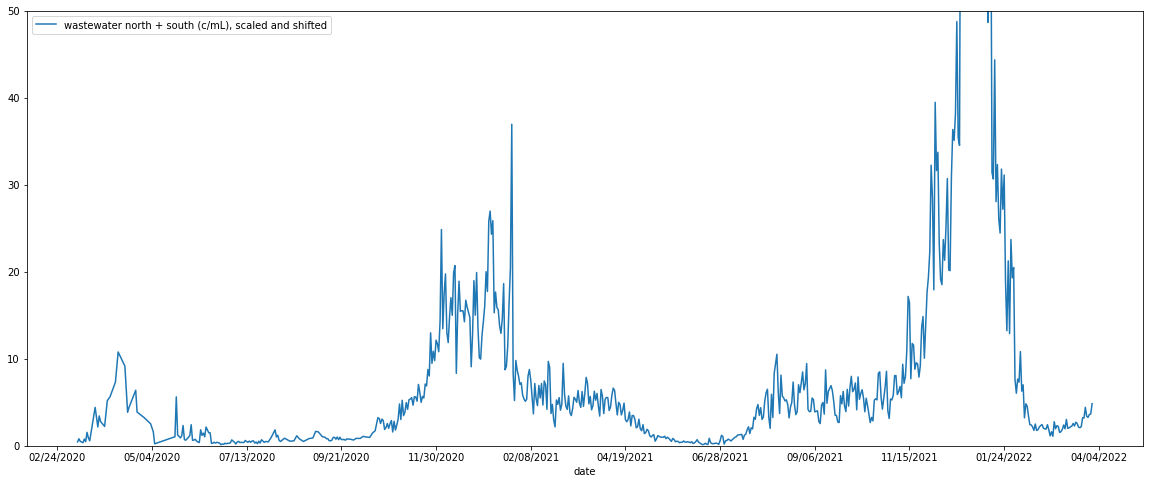

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)'
scale_shift_water = y_w_t_norm*200

#print(scale_shift_water.min())

plt.plot(x_w_t,scale_shift_water,'-',label='wastewater north + south (c/mL), scaled and shifted')

#plt.plot(ref_dates,r1+scale_shift_water.min(),'b--',linewidth=1,label = 'minimum wastewater value over time period')

#plt.plot(x_w_t_run,y_w_t_norm_run*3,'-',label='wastewater, north + south (copies/mL), norm, 3d running ave')


#plt.plot(x_m,y_m,'-',label = 'positivity (%) molecular')
#plt.plot(x_m_run,y_m_run*10,'-',label = 'positivity (%) molecular, 3 day running ave')

#reference line


#plt.plot(x_a,y_a,'-',label = 'positivity (%) antigen')
plt.ylim([0,50])
#plt.ylabel('copies/mL')
plt.xlabel('date')

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 8)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
#plt.title('Positivity is the fraction of positive molecular tests on a given day')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

plt.show()

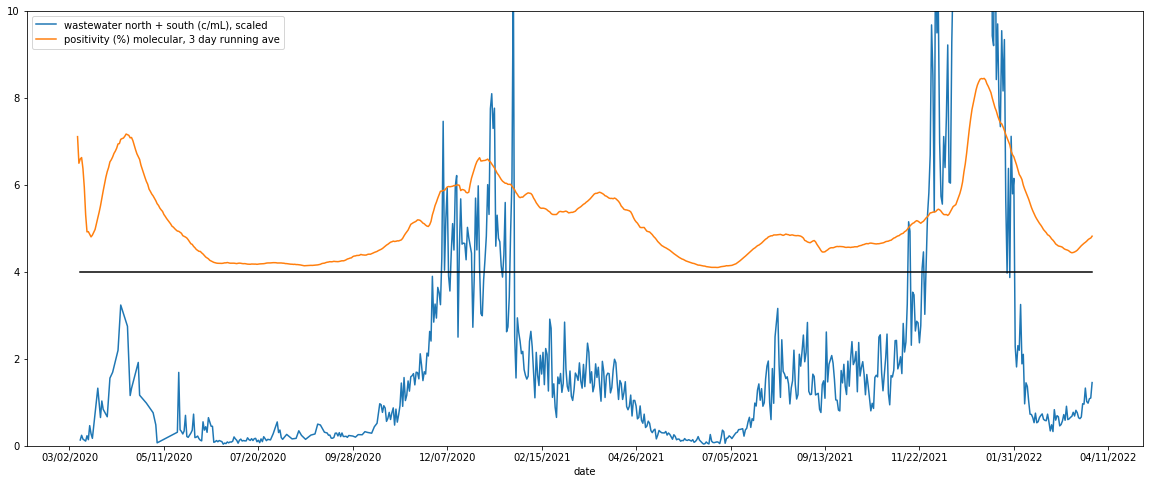

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

plt.plot(x_w_t,y_w_t_norm*60,'-',label='wastewater north + south (c/mL), scaled')

#plt.plot(x_w_t_run,y_w_t_norm_run*3,'-',label='wastewater, north + south (copies/mL), norm, 3d running ave')


#plt.plot(x_m,y_m,'-',label = 'positivity (%) molecular')
plt.plot(x_m_run,y_m_run*10+4,'-',label = 'positivity (%) molecular, 3 day running ave')

#reference line
plt.plot(ref_dates,r1+4,'k-')

#plt.plot(x_a,y_a,'-',label = 'positivity (%) antigen')
plt.ylim([0,10])
#plt.ylabel('copies/mL')
plt.xlabel('date')

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 8)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
#plt.title('Positivity is the fraction of positive molecular tests on a given day')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

plt.show()

In [41]:
len(x_m)

759

In [42]:
dates = []
y_wastewater = []
y_positivity = []

for i in range(0,len(x_w_t)):
    w_date = x_w_t[i]
    for j in range(0,len(x_m)):
        #print(j)
        if (x_m[j]==w_date):
            dates.append(w_date)
            y_wastewater.append(y_w_t[i])
            y_positivity.append(y_m[i])
            #print(w_date)



In [43]:
#if normalize:
#    a = (a - mean(a)) / (std(a) * len(a))
#    v = (v - mean(v)) /  std(v)

yp = np.array(y_positivity)
yw = np.array(y_wastewater)

yp_norm = (yp - yp.mean()) / (yp.std() * len(yp))
yw_norm = (yw - yw.mean()) / (yw.std() * len(yw))

yp_norm_prime= (yp) / (yp.std() * len(yp))
yw_norm_prime = (yw) / (yw.std() * len(yw))


/home/dwblair/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice.
  
/home/dwblair/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dwblair/.local/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/dwblair/.local/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/dwblair/.local/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dwblair/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice.
  if __name__ == '__main__':


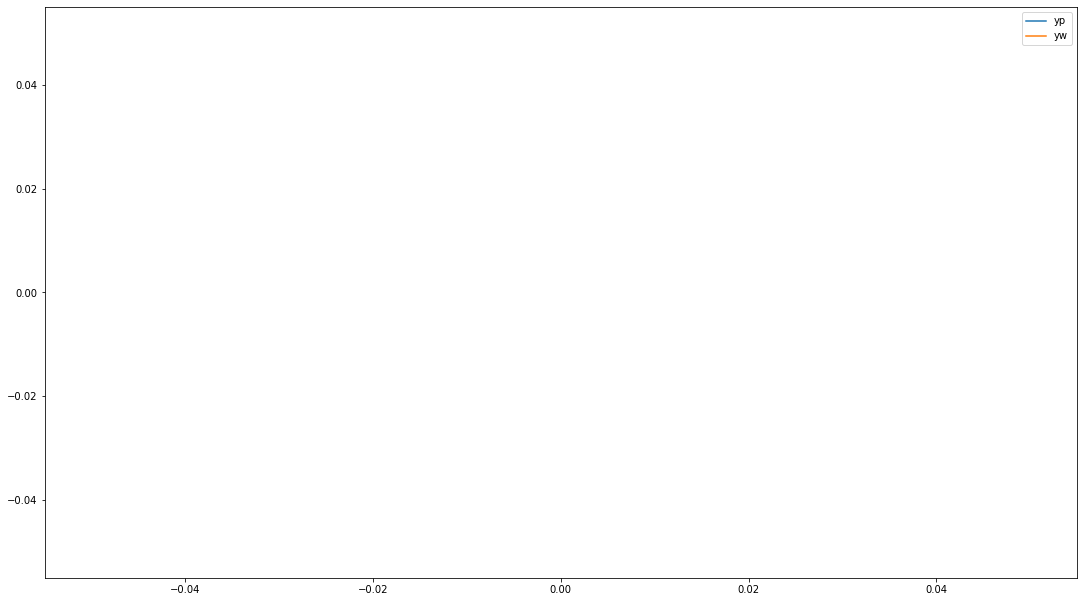

In [44]:
plt.plot(yp_norm_prime,label='yp')
plt.plot(yw_norm_prime,label='yw')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

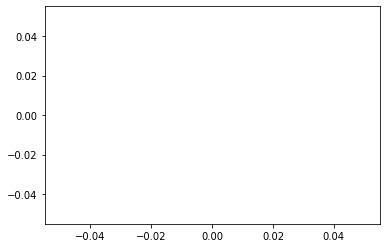

In [45]:
plt.plot(yp_norm)
plt.show()

In [46]:
corr = np.correlate(yp_norm,yp_norm)

ValueError: first array argument cannot be empty

In [ ]:
corr

In [ ]:
import statsmodels.api as sm
corr = sm.tsa.stattools.ccf(yp_norm, yw_norm, adjusted=False)
plt.plot(corr)
plt.show()

In [ ]:
dates

# Biobot data

In [ ]:
# Below code found at https://github.com/jupyterlite/jupyterlite/issues/119
import pandas as pd 
#import micropip
#package_url = "https://raw.githubusercontent.com/innovationOUtside/ouseful_jupyterlite_utils/main/ouseful_jupyterlite_utils-0.0.1-py3-none-any.whl"
#await micropip.install(package_url)

#from ouseful_jupyterlite_utils import pandas_utils as pdu

# use this approach if CSV data is at a remote URL
# Via @jtpio
#URL = "https://raw.githubusercontent.com/edgecollective/wastewater-parse/main/waste.csv"
#df = pd.read_csv('test_by_date.csv')
df = pd.read_csv('https://raw.githubusercontent.com/biobotanalytics/covid19-wastewater-data/master/wastewater_by_region.csv')

#import pandas as pd 
#file = 'covid-19-raw-data-3-9-2022.xlsx'
#data = pd.ExcelFile(file)
#print(data.sheet_names)
#df=data.parse('TestingByDate (Test Date)')
#df

In [ ]:
df

In [ ]:
#df=df.sort_values(by=['region'])

In [ ]:
df

In [ ]:
northeast = df[df['region'].str.contains('Northeast')]
print (northeast)

dates = northeast['sampling_week']
north_water = northeast['effective_concentration_rolling_average'].to_numpy()

import datetime as dt

north_dates=[]
for d in dates:
    north_dates.append(dt.datetime.strptime(d,'%Y-%m-%d').date())

In [ ]:
df.region.unique()

In [ ]:
south = df[df['region'].str.contains('South')]
#print (northeast)

dates = south['sampling_week']
south_water = south['effective_concentration_rolling_average'].to_numpy()

import datetime as dt

south_dates=[]
for d in dates:
    south_dates.append(dt.datetime.strptime(d,'%Y-%m-%d').date())
    


In [ ]:
west = df[df['region'].str.contains('West')]
#print (northeast)

dates = west['sampling_week']
west_water = west['effective_concentration_rolling_average'].to_numpy()

import datetime as dt

west_dates=[]
for d in dates:
    west_dates.append(dt.datetime.strptime(d,'%Y-%m-%d').date())

In [ ]:
midwest = df[df['region'].str.contains('Midwest')]
#print (northeast)

dates = midwest['sampling_week']
midwest_water = midwest['effective_concentration_rolling_average'].to_numpy()

import datetime as dt

midwest_dates=[]
for d in dates:
    midwest_dates.append(dt.datetime.strptime(d,'%Y-%m-%d').date())

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

plt.plot(north_dates,north_water,label='north')
plt.plot(south_dates,south_water,label='south')
plt.plot(west_dates,west_water,label='west')
plt.plot(midwest_dates,midwest_water,label='midwest')
#plt.plot(x_m,np.array(y_m)*6000,'--',label = 'positivity (%) molecular')
#plt.plot(x_a,y_a,'--',label = 'positivity (%) antigen')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.ylim([0,1000])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

scale_factor=3000

plt.plot(north_dates,north_water,label='wastewater_north')
plt.plot(south_dates,south_water,label='wastewater_south')
plt.plot(west_dates,west_water,label='wastewater_west')
plt.plot(midwest_dates,midwest_water,label='wastewater_midwest')
#plt.plot(x_m,np.array(y_m)*scale_factor,'--',label = 'positivity (%) molecular')
#plt.plot(x_a,np.array(y_a)*scale_factor,'--',label = 'positivity (%) antigen')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.ylim([0,1000])
plt.show()